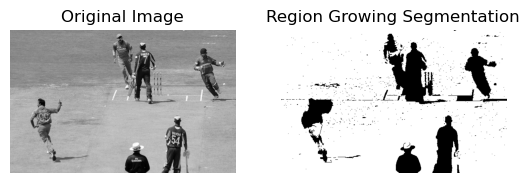

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    
    
    segmented_image[seed] = 255 
  
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
 
    to_process = [seed]
    
    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel
      
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny)) 
    
    return segmented_image

image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

seed = (5, 5)
threshold = 10


segmented_image = region(image_gray, seed, threshold)


plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis("off")

plt.show()


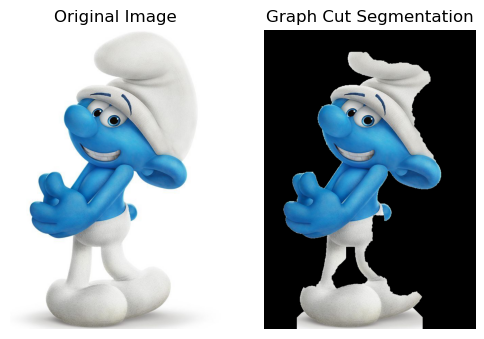

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\student\Pictures\cv\smurfs.jpg")

# Convert to RGB (OpenCV loads images in BGR by default, so we convert to RGB for correct display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a mask and initialize background and foreground models
mask = np.zeros(image.shape[:2], np.uint8)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle around the object (this is the initial segmentation)
rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to binary: 0/1 (background/foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1)

# Show the segmented image by applying the mask
segmented_image = image * mask2[:, :, np.newaxis]

# Convert the segmented image from BGR to RGB for proper display
segmented_image = np.uint8(segmented_image)  # Convert to uint8

# Convert segmented image from BGR to RGB for display
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Display both the original and segmented images side by side
plt.figure(figsize=(6, 6))

# Original Image
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis("off")

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image_rgb)
plt.title('Graph Cut Segmentation')
plt.axis("off")

# Show the images
plt.show()


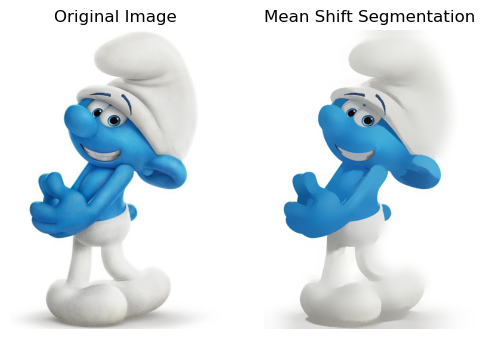

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\student\Pictures\cv\smurfs.jpg")

# Convert to RGB (OpenCV loads images in BGR by default, so we convert to RGB for correct display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Mean Shift filtering (segmentation)
# Parameters: sp (spatial window radius), sr (color window radius), max level of pyramid
mean_shift_result = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51, maxLevel=1)

# Convert the result to RGB for display
mean_shift_result_rgb = cv2.cvtColor(mean_shift_result, cv2.COLOR_BGR2RGB)

# Display both the original and segmented images side by side
plt.figure(figsize=(6, 6))

# Original Image
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis("off")

# Mean Shift Segmentation Image
plt.subplot(1, 2, 2)
plt.imshow(mean_shift_result_rgb)
plt.title('Mean Shift Segmentation')
plt.axis("off")
# Show the images
plt.show()


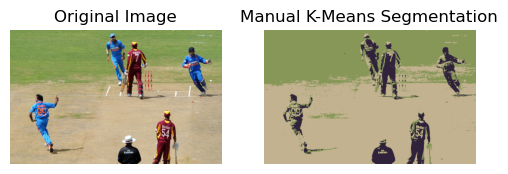

Centroids of K clusters (RGB values):
[[ 48.05677521  34.81764706  59.18067227]
 [195.34393235 178.55318284 144.90822265]
 [134.01608767 151.93317143  88.92745137]]


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Euclidean distance
def euclidean_distance(pixels, centroid):
    return np.linalg.norm(pixels - centroid, axis=1)

# Function to perform K-Means clustering manually
def kmeans_segmentation(image, K=3, max_iters=100, tol=1e-5):
    # Reshaping the image into a 2D array of pixels (N x 3)
    pixels = image.reshape((-1, 3))

    # Initialize K centroids randomly from the image pixels
    np.random.seed(0)  # For reproducibility
    centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]
    
    for _ in range(max_iters):
        # Step 1: Assign each pixel to the nearest centroid
        distances = np.array([euclidean_distance(pixels, centroid) for centroid in centroids]).T
        labels = np.argmin(distances, axis=1)

        # Step 2: Recompute centroids by calculating the mean of all pixels assigned to each centroid
        new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(K)])
        
        # Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        
        centroids = new_centroids

    # Step 3: Assign the final labels to each pixel and reshape back to original image shape
    segmented_image = centroids[labels].reshape(image.shape)
    return segmented_image, centroids, labels

# Load an image
image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform K-Means segmentation manually
segmented_image, centroids, labels = kmeans_segmentation(image_rgb, K=3)

# Display both the original and segmented images side by side
plt.figure(figsize=(6, 6))

# Original Image
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis("off")

# Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Manual K-Means Segmentation')
plt.axis("off")
# Show the images
plt.show()

# Optionally, print centroids (the average color for each segment)
print("Centroids of K clusters (RGB values):")
print(centroids)


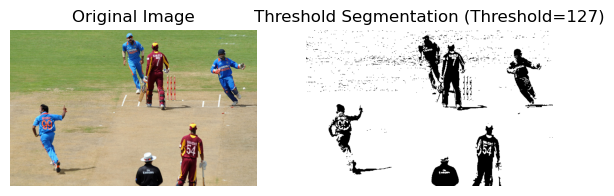

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform manual threshold segmentation
def threshold_segmentation(image, threshold_value):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image
    
    # Apply the threshold: pixels greater than the threshold_value are set to 255 (white), else 0 (black)
    _, thresholded_image = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)
    
    return thresholded_image

# Load the image
image = cv2.imread(r"C:\Users\student\Pictures\cv\cricket.jpg")

# Choose a threshold value (You can change this value as needed)
threshold_value = 127

# Perform threshold segmentation
segmented_image = threshold_segmentation(image, threshold_value)

# Display both the original and thresholded images side by side
plt.figure(figsize=(7, 7))

# Original Image (converted to grayscale for display)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis("off")

# Thresholded Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title(f'Threshold Segmentation (Threshold={threshold_value})')
plt.axis("off")

# Show the images
plt.show()
